1) Let a be the matrix of size (n,k)
Let b be the matrix of size (k,m)
For each row in the matrix a, We multiply each element of that coloumn vector with every row vector of b
that will be n*k*m multiplications and n*(k-1)*m additions.

In [8]:
import time
import numpy as np

n, k, m = 100,100,100

A = np.random.rand(n, k)
B = np.random.rand(k, m)

def matrix_multiply_list(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def matrix_multiply_numpy(A, B):
    return np.dot(A, B)

start_time = time.time()
result_list = matrix_multiply_list(A, B)
time_list = time.time() - start_time

A_np = np.array(A)
B_np = np.array(B)
start_time = time.time()
result_numpy = matrix_multiply_numpy(A_np, B_np)
time_numpy = time.time() - start_time

print("Result using list of lists:")
# print(result_list)
print(f"Time taken using list of lists: {time_list} seconds")

print("\nResult using numpy:")
# print(result_numpy)
print(f"Time taken using numpy: {time_numpy} seconds")

if time_list > time_numpy:
    print("\nNumPy is faster.")
else:
    print("\nList of lists is faster.")
#change variables and give similar code

Result using list of lists:
Time taken using list of lists: 0.9397580623626709 seconds

Result using numpy:
Time taken using numpy: 0.001127004623413086 seconds

NumPy is faster.


In [9]:
import time
import numpy as np

def find_kth_smallest_element(numbers, k):
    for i in range(k):
        min_index = i
        for j in range(i + 1, len(numbers)):
            if numbers[j] < numbers[min_index]:
                min_index = j
        numbers[i], numbers[min_index] = numbers[min_index], numbers[i]
    return numbers[k - 1]

def find_median_multiple_passes(numbers):
    length = len(numbers)
    if length % 2 == 1:
        return find_kth_smallest_element(numbers, length // 2 + 1)
    else:
        return 0.5 * (
            find_kth_smallest_element(numbers, length // 2) + 
            find_kth_smallest_element(numbers, length // 2 + 1)
        )

def find_median_with_sorting(numbers):
    sorted_numbers = sorted(numbers)
    length = len(sorted_numbers)
    if length % 2 == 1:
        return sorted_numbers[length // 2]
    else:
        return 0.5 * (sorted_numbers[length // 2 - 1] + sorted_numbers[length // 2])

random_numbers = np.random.randint(0, 10000, 10000).tolist()

start_time = time.time()
median_multiple_passes = find_median_multiple_passes(random_numbers[:])
time_multiple_passes = time.time() - start_time

start_time = time.time()
median_sort = find_median_with_sorting(random_numbers[:])
time_sort = time.time() - start_time

start_time = time.time()
median_numpy = np.median(random_numbers)
time_numpy = time.time() - start_time

median_multiple_passes, time_multiple_passes, median_sort, time_sort, median_numpy, time_numpy


(5085.5, 5.60142970085144, 5085.5, 0.0, 5085.5, 0.0)

In [3]:
from IPython.display import display, Math

display(Math(r"f(x, y) = x^2 y + y^3 \sin(x)"))

display(Math(r"\left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right)"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
!pip install jax jaxlib

In [14]:
import jax.numpy as jnp
from jax import grad
import numpy as np

def my_function(a, b):
    return a**2 * b + b**3 * jnp.sin(a)

grad_my_function_a = grad(my_function, argnums=0)
grad_my_function_b = grad(my_function, argnums=1)

def analytical_gradient(a, b):
    dfd_a = 2 * a * b + b**3 * jnp.cos(a)
    dfd_b = a**2 + 3 * b**2 * jnp.sin(a)
    return dfd_a, dfd_b

np.random.seed(0)

a_values = np.random.rand(5)
b_values = np.random.rand(5)

for a, b in zip(a_values, b_values):
    jax_grad_a = grad_my_function_a(a, b)
    jax_grad_b = grad_my_function_b(a, b)
    analytical_grad_a, analytical_grad_b = analytical_gradient(a, b)
    
    print(f"a: {a}, b: {b}")
    print(f"JAX grad a: {jax_grad_a}, Analytical grad a: {analytical_grad_a}")
    print(f"JAX grad b: {jax_grad_b}, Analytical grad b: {analytical_grad_b}")
    print()


a: 0.5488135039273248, b: 0.6458941130666561
JAX grad a: 0.9388335347175598, Analytical grad a: 0.9388335347175598
JAX grad b: 0.9540925025939941, Analytical grad b: 0.9540925025939941

a: 0.7151893663724195, b: 0.4375872112626925
JAX grad a: 0.6891745328903198, Analytical grad a: 0.6891745924949646
JAX grad b: 0.8881958723068237, Analytical grad b: 0.8881958723068237

a: 0.6027633760716439, b: 0.8917730007820798
JAX grad a: 1.6592676639556885, Analytical grad a: 1.6592676639556885
JAX grad b: 1.7158708572387695, Analytical grad b: 1.7158708572387695

a: 0.5448831829968969, b: 0.9636627605010293
JAX grad a: 1.8154761791229248, Analytical grad a: 1.8154761791229248
JAX grad b: 1.7408998012542725, Analytical grad b: 1.7408998012542725

a: 0.4236547993389047, b: 0.3834415188257777
JAX grad a: 0.37628597021102905, Analytical grad a: 0.37628600001335144
JAX grad b: 0.3608100116252899, Analytical grad b: 0.3608100414276123



In [17]:
!pip install sympy

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.2 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.0/6.2 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 2.1/6.2 MB 3.6 MB/s eta 0:00:02
   --------------------------- ------------ 4.2/6.2 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ---------------------------------------- 536.2/536.2 kB 8.6 MB/s eta 0:00:00


In [18]:
import sympy as sp

a, b = sp.symbols('a b')

g = a**2 * b + b**3 * sp.sin(a)

partial_a = sp.diff(g, a)
partial_b = sp.diff(g, b)

analytical_gradient = (partial_a, partial_b)

print("Analytical Gradient:", analytical_gradient)


Analytical Gradient: (2*a*b + b**3*cos(a), a**2 + 3*b**2*sin(a))


In [21]:
student_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Alice',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
            2: {
                'Name': 'Bob',
                'Marks': {
                    'Maths': 95,
                    'English': 80
                }
            }
        },
        'Branch 2': {
            3: {
                'Name': 'Charlie',
                'Marks': {
                    'Maths': 85,
                    'English': 75
                }
            },
            4: {
                'Name': 'David',
                'Marks': {
                    'Maths': 90,
                    'English': 85
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            5: {
                'Name': 'Eve',
                'Marks': {
                    'Maths': 88,
                    'English': 82
                }
            },
            6: {
                'Name': 'Frank',
                'Marks': {
                    'Maths': 92,
                    'English': 78
                }
            }
        },
        'Branch 2': {
            7: {
                'Name': 'Grace',
                'Marks': {
                    'Maths': 89,
                    'English': 87
                }
            },
            8: {
                'Name': 'Heidi',
                'Marks': {
                    'Maths': 84,
                    'English': 91
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            9: {
                'Name': 'Ivy',
                'Marks': {
                    'Maths': 91,
                    'English': 89
                }
            },
            10: {
                'Name': 'Jack',
                'Marks': {
                    'Maths': 93,
                    'English': 85
                }
            }
        },
        'Branch 2': {
            11: {
                'Name': 'Kim',
                'Marks': {
                    'Maths': 90,
                    'English': 88
                }
            },
            12: {
                'Name': 'Liam',
                'Marks': {
                    'Maths': 92,
                    'English': 82
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            13: {
                'Name': 'Mona',
                'Marks': {
                    'Maths': 87,
                    'English': 90
                }
            },
            14: {
                'Name': 'Nina',
                'Marks': {
                    'Maths': 94,
                    'English': 88
                }
            }
        },
        'Branch 2': {
            15: {
                'Name': 'Oscar',
                'Marks': {
                    'Maths': 86,
                    'English': 83
                }
            },
            16: {
                'Name': 'Paul',
                'Marks': {
                    'Maths': 89,
                    'English': 85
                }
            }
        }
    }
}

def print_student_records(records):
    for year, branches in records.items():
        print(f"Year: {year}")
        for branch_name, students in branches.items():
            print(f"  {branch_name}")
            for roll_number, student_info in students.items():
                name = student_info['Name']
                marks = student_info['Marks']
                print(f"    Roll Number: {roll_number}, Name: {name}, Marks:")
                for subject, mark in marks.items():
                    print(f"      {subject}: {mark}")

print_student_records(student_records)


Year: 2022
  Branch 1
    Roll Number: 1, Name: Alice, Marks:
      Maths: 100
      English: 70
    Roll Number: 2, Name: Bob, Marks:
      Maths: 95
      English: 80
  Branch 2
    Roll Number: 3, Name: Charlie, Marks:
      Maths: 85
      English: 75
    Roll Number: 4, Name: David, Marks:
      Maths: 90
      English: 85
Year: 2023
  Branch 1
    Roll Number: 5, Name: Eve, Marks:
      Maths: 88
      English: 82
    Roll Number: 6, Name: Frank, Marks:
      Maths: 92
      English: 78
  Branch 2
    Roll Number: 7, Name: Grace, Marks:
      Maths: 89
      English: 87
    Roll Number: 8, Name: Heidi, Marks:
      Maths: 84
      English: 91
Year: 2024
  Branch 1
    Roll Number: 9, Name: Ivy, Marks:
      Maths: 91
      English: 89
    Roll Number: 10, Name: Jack, Marks:
      Maths: 93
      English: 85
  Branch 2
    Roll Number: 11, Name: Kim, Marks:
      Maths: 90
      English: 88
    Roll Number: 12, Name: Liam, Marks:
      Maths: 92
      English: 82
Year: 2025
  Bran

In [27]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __str__(self):
        marks_str = ', '.join(f"{subject}: {score}" for subject, score in self.marks.items())
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {marks_str}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch_name, students):
        self.branches[branch_name] = students

    def __str__(self):
        branches_str = '\n'.join(
            f"Branch: {branch_name}\n" + '\n'.join(str(student) for student in students)
            for branch_name, students in self.branches.items()
        )
        return f"Year: {self.year}\n{branches_str}"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __str__(self):
        years_str = '\n'.join(str(year) for year in self.years)
        return years_str

students_2022_branch1 = [
    Student(1, 'Alice', {'Maths': 100, 'English': 70}),
    Student(2, 'Bob', {'Maths': 95, 'English': 80})
]
students_2022_branch2 = [
    Student(3, 'Charlie', {'Maths': 85, 'English': 75}),
    Student(4, 'David', {'Maths': 90, 'English': 85})
]

students_2023_branch1 = [
    Student(5, 'Eve', {'Maths': 88, 'English': 82}),
    Student(6, 'Frank', {'Maths': 92, 'English': 78})
]
students_2023_branch2 = [
    Student(7, 'Grace', {'Maths': 89, 'English': 87}),
    Student(8, 'Heidi', {'Maths': 84, 'English': 91})
]

students_2024_branch1 = [
    Student(9, 'Ivy', {'Maths': 91, 'English': 89}),
    Student(10, 'Jack', {'Maths': 93, 'English': 85})
]
students_2024_branch2 = [
    Student(11, 'Kim', {'Maths': 90, 'English': 88}),
    Student(12, 'Liam', {'Maths': 92, 'English': 82})
]

students_2025_branch1 = [
    Student(13, 'Mona', {'Maths': 87, 'English': 90}),
    Student(14, 'Nina', {'Maths': 94, 'English': 88})
]
students_2025_branch2 = [
    Student(15, 'Oscar', {'Maths': 86, 'English': 83}),
    Student(16, 'Paul', {'Maths': 89, 'English': 85})
]

year_2022 = Year(2022)
year_2022.add_branch('Branch 1', students_2022_branch1)
year_2022.add_branch('Branch 2', students_2022_branch2)

year_2023 = Year(2023)
year_2023.add_branch('Branch 1', students_2023_branch1)
year_2023.add_branch('Branch 2', students_2023_branch2)

year_2024 = Year(2024)
year_2024.add_branch('Branch 1', students_2024_branch1)
year_2024.add_branch('Branch 2', students_2024_branch2)

year_2025 = Year(2025)
year_2025.add_branch('Branch 1', students_2025_branch1)
year_2025.add_branch('Branch 2', students_2025_branch2)

database = Database()
database.add_year(year_2022)
database.add_year(year_2023)
database.add_year(year_2024)
database.add_year(year_2025)

print(database)

Year: 2022
Branch: Branch 1
Roll Number: 1, Name: Alice, Marks: Maths: 100, English: 70
Roll Number: 2, Name: Bob, Marks: Maths: 95, English: 80
Branch: Branch 2
Roll Number: 3, Name: Charlie, Marks: Maths: 85, English: 75
Roll Number: 4, Name: David, Marks: Maths: 90, English: 85
Year: 2023
Branch: Branch 1
Roll Number: 5, Name: Eve, Marks: Maths: 88, English: 82
Roll Number: 6, Name: Frank, Marks: Maths: 92, English: 78
Branch: Branch 2
Roll Number: 7, Name: Grace, Marks: Maths: 89, English: 87
Roll Number: 8, Name: Heidi, Marks: Maths: 84, English: 91
Year: 2024
Branch: Branch 1
Roll Number: 9, Name: Ivy, Marks: Maths: 91, English: 89
Roll Number: 10, Name: Jack, Marks: Maths: 93, English: 85
Branch: Branch 2
Roll Number: 11, Name: Kim, Marks: Maths: 90, English: 88
Roll Number: 12, Name: Liam, Marks: Maths: 92, English: 82
Year: 2025
Branch: Branch 1
Roll Number: 13, Name: Mona, Marks: Maths: 87, English: 90
Roll Number: 14, Name: Nina, Marks: Maths: 94, English: 88
Branch: Branch 

Matplotlib is building the font cache; this may take a moment.


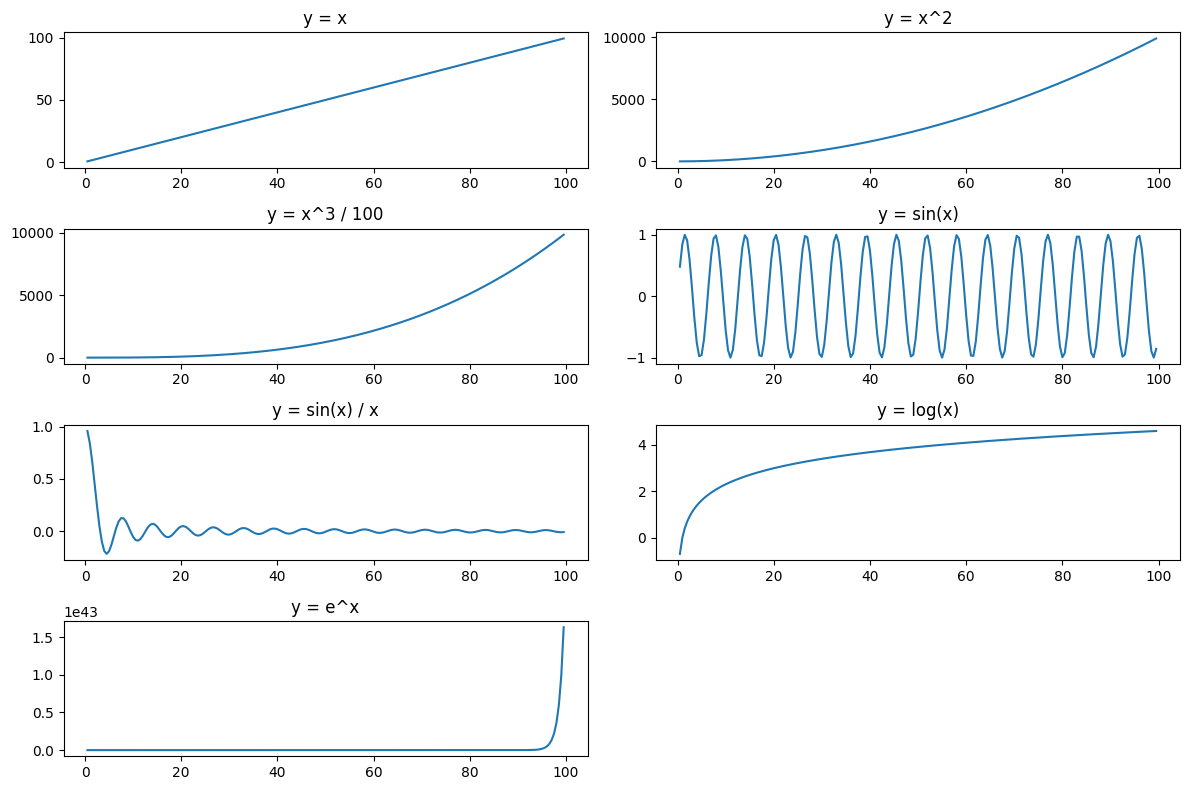

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title('y = x^3 / 100')

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title('y = sin(x) / x')

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(4, 2, 7)
plt.plot(x, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
import pandas as pd

np.random.seed(50)
data_array = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(data_array, columns=['a', 'b', 'c', 'd', 'e'])

highest_std_column = df.std().idxmax()
lowest_mean_row = df.mean(axis=1).idxmin()

print(f"Column with the highest standard deviation: {highest_std_column}")
print(f"Row with the lowest mean: {lowest_mean_row}")


Column with the highest standard deviation: e
Row with the lowest mean: 5


In [31]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num_rows_LT8 = df[df['g'] == 'LT8'].shape[0]
std_LT8 = df[df['g'] == 'LT8']['f'].std()
std_GT8 = df[df['g'] == 'GT8']['f'].std()

print(f"Number of rows where 'g' is 'LT8': {num_rows_LT8}")
print(f"Standard deviation of 'f' for 'LT8': {std_LT8}")
print(f"Standard deviation of 'f' for 'GT8': {std_GT8}")

Number of rows where 'g' is 'LT8': 15
Standard deviation of 'f' for 'LT8': 0.4946067183858458
Standard deviation of 'f' for 'GT8': 0.15941827858857197


In [34]:
import numpy as np
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
vector = np.array([1, 2, 3])

result = arr + vector

print("Original Array:")
print(arr)
print("\n Vector:")
print(vector)
print("\nResult after broadcasting:")
print(result)

Original Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

 Vector:
[1 2 3]

Result after broadcasting:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


In [32]:
def custom_argmin(arr):
    min_index = 0 
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

array = np.array([5, 3, 8, 1, 7])
index_min = custom_argmin(array)
print("Index of minimum element (Custom function):", index_min)
index_np_argmin = np.argmin(array)
print("Index of minimum element (np.argmin):", index_np_argmin)

Index of minimum element (Custom function): 3
Index of minimum element (np.argmin): 3
